# Data visualization project

## Importing libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data and printing columns

In [3]:
diabetes = pd.read_csv('diabetic_data.csv')
diabetes.columns 

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Here we are displaying the columns of the datset as there are many columns in the dataset we must have knowledge of the columns and what data is there in the column.

In [5]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (101766, 50)


## Number of male and female.

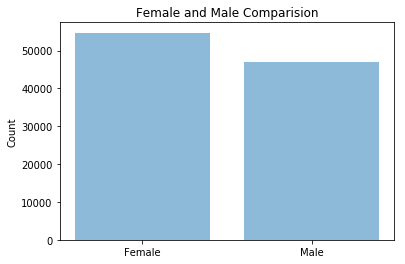

In [18]:
female,male,c = diabetes.groupby('gender').size()
objects = ('Female', 'Male')
y_pos = np.arange(len(objects))
performance = [female,male]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Female and Male Comparision')
plt.show()

## Patients from different Races

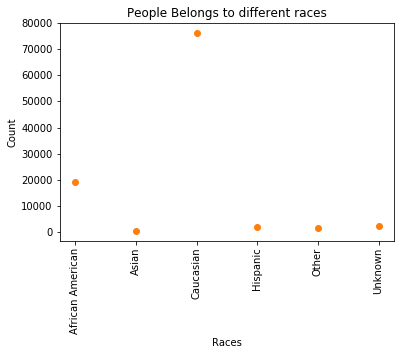

In [7]:
unknown,AfricanAmerican,Asian,Caucasian,Hispanic,Other =diabetes.groupby('race').size()
names = ['Unknown', 'African American','Asian','Caucasian','Hispanic','Other' ]
values = [unknown,AfricanAmerican,Asian,Caucasian,Hispanic,Other]
plt.scatter(names, values, color='C1')
plt.ylabel('Count')
plt.xlabel('Races')
plt.title('People Belongs to different races')
plt.xticks(rotation=90)
plt.show()

## Petiants by different age group.

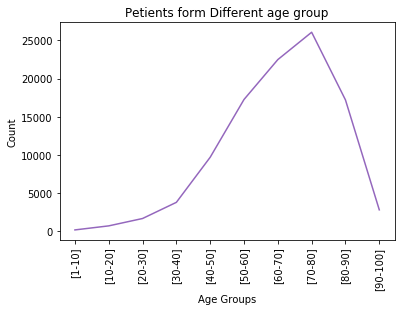

In [11]:
ten,twinty,thirty,fourty,fifty,sixty,seventy,eighty,ninthy,hundrend = diabetes.groupby('age').size()
objects = ('[1-10]', '[10-20]','[20-30]','[30-40]','[40-50]','[50-60]','[60-70]','[70-80]','[80-90]','[90-100]')
y_pos = np.arange(len(objects))
performance = [ten,twinty,thirty,fourty,fifty,sixty,seventy,eighty,ninthy,hundrend]
plt.plot(y_pos, performance, alpha=1, color='C4')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.xlabel('Age Groups')
plt.title('Petients form Different age group')
plt.xticks(rotation=90)
plt.show()


## Patients by thier Admission types 

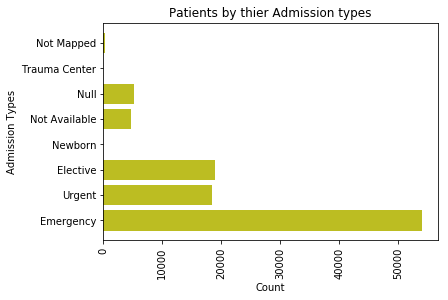

In [17]:
one,to,three,four,five,six,saven,eight = diabetes.groupby('admission_type_id').size()
objects = ('Emergency', 'Urgent','Elective','Newborn','Not Available','Null','Trauma Center','Not Mapped')
y_pos = np.arange(len(objects))
performance = [one,to,three,four,five,six,saven,eight]
plt.barh(y_pos, performance, align='center', alpha=1, color = 'C8')
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.ylabel('Admission Types')
plt.title('Patients by thier Admission types')
plt.xticks(rotation=90)
plt.show()

## Medical Speciality

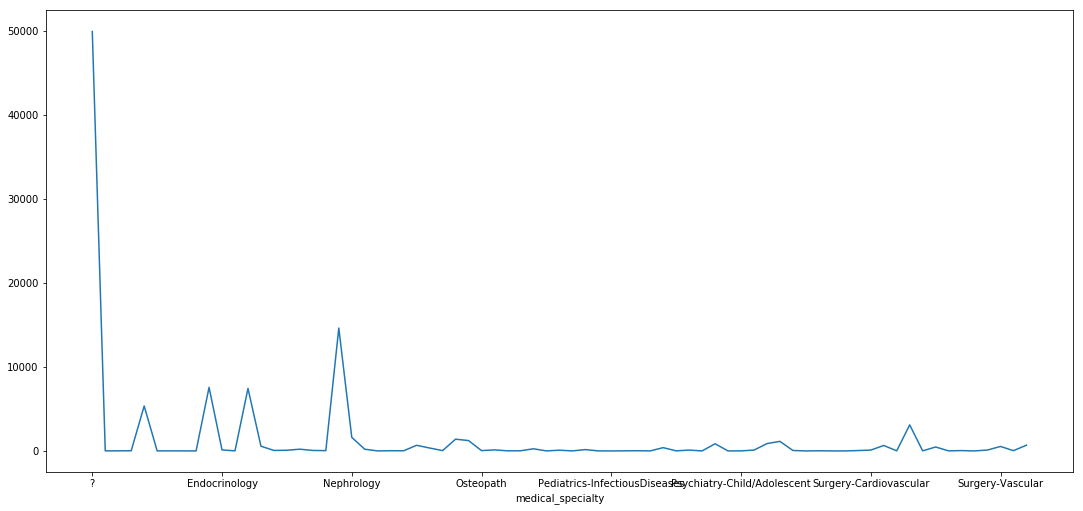

In [56]:
fig, ax = plt.subplots(figsize=(15,7))
fig.tight_layout()
diabetes.groupby('medical_specialty').count()['encounter_id'].plot(ax=ax)


## Metformin in Patients

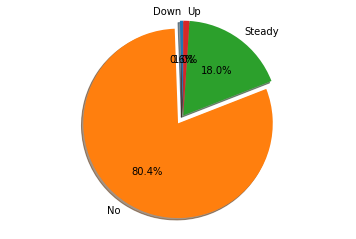

In [58]:
down,No,Steady,up = diabetes.groupby('metformin').size()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Down', 'No', 'Steady', 'Up'
sizes = [down,No,Steady,up]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Repaglinide in Patients

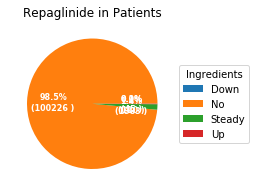

In [64]:
d,n,s,u=diabetes.groupby('repaglinide').size()
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = [d,n,s,u]
ingredients = ['Down', 'No', 'Steady', 'Up'] 


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Repaglinide in Patients")

plt.show()

## Insulin in Patients

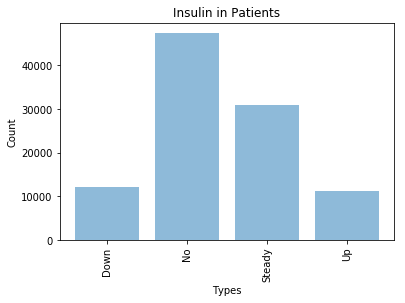

In [66]:
d1,n1,s1,u1 = diabetes.groupby('insulin').size()
objects = ('Down', 'No', 'Steady', 'Up')
y_pos = np.arange(len(objects))
performance = [d1,n1,s1,u1]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.xlabel('Types')
plt.title('Insulin in Patients')
plt.xticks(rotation=90)
plt.show()

## Changes in patients

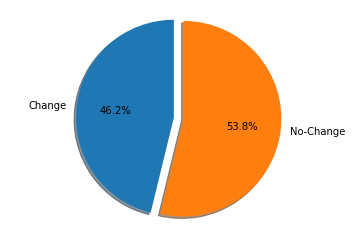

In [69]:
ch,no = diabetes.groupby('change').size()
labels = 'Change', 'No-Change'
sizes = [ch,no]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## diabetesMed 

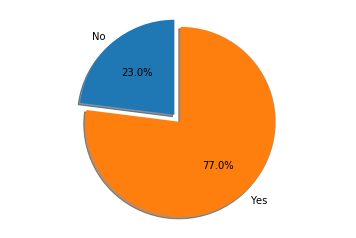

In [75]:
ch,no = diabetes.groupby('diabetesMed').size()
labels = 'No', 'Yes'
sizes = [ch,no]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Readmitted

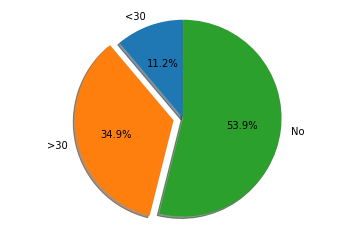

In [76]:
l,g,nnn = diabetes.groupby('readmitted').size()

labels = '<30', '>30','No'
sizes = [l,g,nnn]
explode = (0, 0.1,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

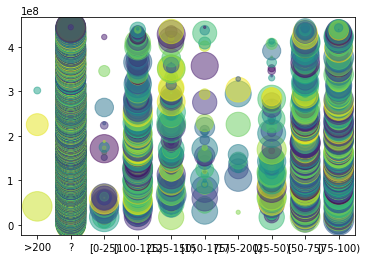

In [8]:
N = 101766
x = diabetes['weight']
y = diabetes['encounter_id']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Report for different gradiant in blood sample of patients

Text(0.5,0.98,'Checking Report')

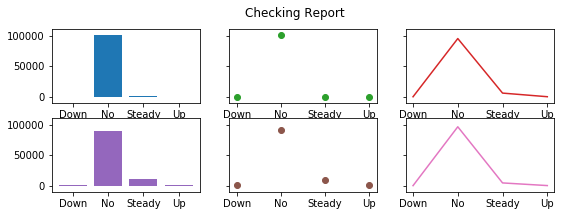

In [28]:

d2,n2,s2,u2 = diabetes.groupby('nateglinide').size()
d3,n3,s3,u3 = diabetes.groupby('chlorpropamide').size()
d4,n4,s4,u4 = diabetes.groupby('rosiglitazone').size()
d5,n5,s5,u5 = diabetes.groupby('glipizide').size()
d6,n6,s6,u6 = diabetes.groupby('glyburide').size()
d7,n7,s7,u7 = diabetes.groupby('glimepiride').size()
names =['Down', 'No', 'Steady', 'Up']
values1 = [d2,n2,s2,u2]
values2 = [d3,n3,s3,u3]
values3 = [d4,n4,s4,u4]
values4 = [d5,n5,s5,u5]
values5 = [d6,n6,s6,u6]
values6 = [d7,n7,s7,u7]

fig, axs = plt.subplots(2, 3, figsize=(9, 3), sharey=True)
axs[0,0].bar(names, values1)
axs[0,1].scatter(names, values2, color='C2')
axs[0,2].plot(names, values3, color='C3')
axs[1,0].bar(names, values4, color='C4')
axs[1,1].scatter(names, values5, color='C5')
axs[1,2].plot(names, values6, color='C6')
fig.suptitle('Checking Report')